# **Interpolation vs Approximation**

This notebook demonstrates the fundamental difference between:
- **Interpolation**: Finding a function that passes exactly through all data points
- **Approximation**: Finding a function that captures the underlying trend of the data

We'll use the classic Runge phenomenon example to show why high-degree polynomial interpolation can be problematic.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(42)


# **1. Data Generation**
This section generates synthetic data points from a Runge-like function, including some strategic outliers, to illustrate the challenges for interpolation.
Generate 10 points from the Runge function with added noise

In [2]:
# Unevenly spaced points
x = np.linspace(-3, 3, 15)
# Base non-linear pattern
base_pattern = 0.5 * np.sin(2 * x) + 0.3 * x
# Small noise
y_clean = base_pattern + 0.1 * np.random.randn(len(x))

# Adding strategic outliers
outlier_indices = [3, 9, 12]
y = y_clean.copy()
y[outlier_indices] += np.array([1.2, -0.9, 1.5]) # Large deviations

# True function (without outliers)
x_eval = np.linspace(-3.5, 3.5, 500)
y_true = 0.5 * np.sin(2 * x_eval) + 0.3 * x_eval


# **2. Polynomial Interpolation**
This section performs polynomial interpolation (high degree) and a robust quadratic approximation on the generated data.
Compute coefficients of the unique 9th-degree interpolating polynomial
Using Vandermonde matrix approach

In [3]:
# Polynomial interpolation (unstable)
poly_coeffs = np.polyfit(x, y, deg=len(x) - 1)
y_poly = np.polyval(poly_coeffs, x_eval)

# Robust approximation (quadratic regression)
approx_coeffs = np.polyfit(x, y, deg=2)
y_approx = np.polyval(approx_coeffs, x_eval)


# **3. Result Visualization**
This section visualizes the original data, the true underlying function, the high-degree polynomial interpolation, and the quadratic approximation, highlighting the Runge phenomenon.

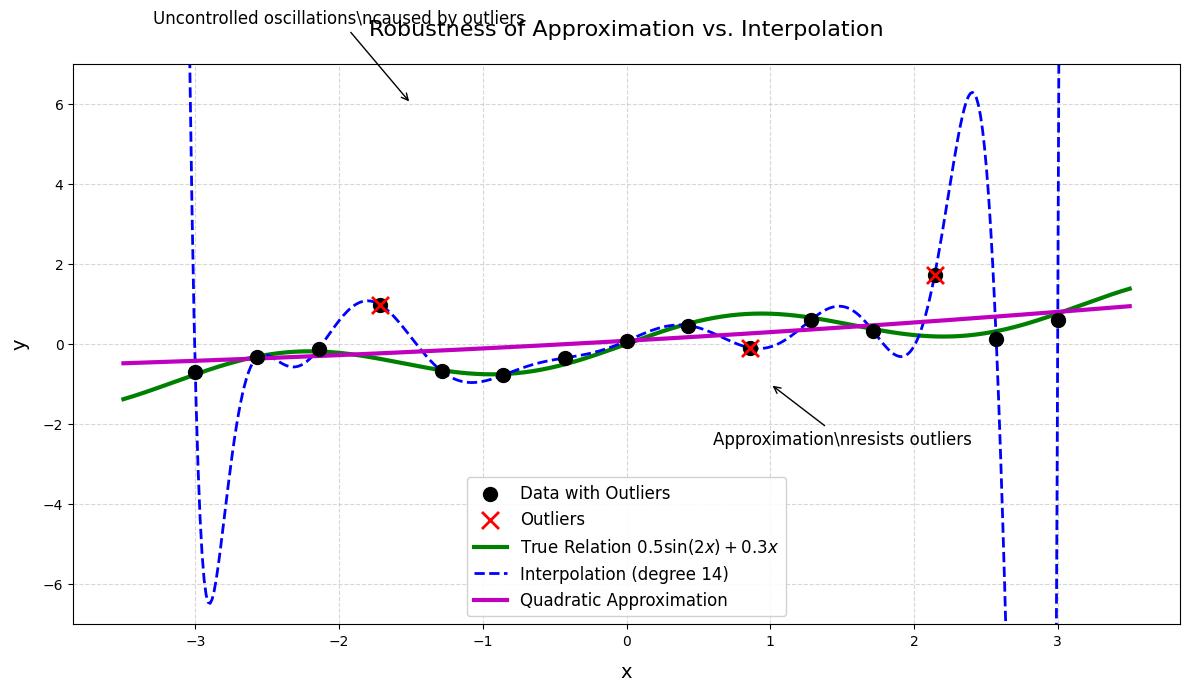

In [4]:
plt.figure(figsize=(12, 7))

plt.scatter(x, y, c='k', s=100, label='Data with Outliers', zorder=5)
plt.scatter(x[outlier_indices], y[outlier_indices],
            c='r', s=150, marker='x', linewidths=2, label='Outliers', zorder=6)
plt.plot(x_eval, y_true, 'g-', lw=3,
         label='True Relation $0.5\sin(2x)+0.3x$')
plt.plot(x_eval, y_poly, 'b--', lw=2,
         label=f'Interpolation (degree {len(x) - 1})')
plt.plot(x_eval, y_approx, 'm-', lw=3,
         label='Quadratic Approximation')

# Professional formatting
plt.title('Robustness of Approximation vs. Interpolation', fontsize=16, pad=20)
plt.xlabel('x', fontsize=14, labelpad=10)
plt.ylabel('y', fontsize=14, labelpad=10)
plt.legend(fontsize=12, framealpha=0.9)
plt.grid(True, linestyle='--', alpha=0.5)

# Optimized y-axis scale
plt.ylim([-7, 7])

# Educational annotations
plt.annotate('Uncontrolled oscillations\\ncaused by outliers',
             xy=(-1.5, 6), xytext=(-2, 8),
             arrowprops=dict(arrowstyle="->"),
             fontsize=12, ha='center')

plt.annotate('Approximation\\nresists outliers',
             xy=(1, -1), xytext=(1.5, -2.5),
             arrowprops=dict(arrowstyle="->"),
             fontsize=12, ha='center')

plt.tight_layout()
plt.show()
